In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd
data = pd.read_csv("/home/ui556004/projects/musicbert_hf/scripts/wandb_logs/wandb_nas_more.csv")
len(data)

In [38]:
data.columns.values

array(['Name', 'State', 'Created', 'Group', 'seed',
       'eval/inversion_accuracy', 'train/learning_rate',
       'eval/key_pc_mode_accuracy', 'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'End Time', 'Notes', 'eval/accuracy',
       'hyperparams.inversion.linear_layers_dim',
       'hyperparams.key_pc_mode.activation_fn',
       'hyperparams.inversion.activation_fn',
       'hyperparams.inversion.normalisation',
       'hyperparams.inversion.pooler_dropout',
       'hyperparams.freeze_layers'], dtype=object)

In [ ]:
from ast import literal_eval
columns = [column   for column in data.columns.values if not (column.endswith("__MIN") or column.endswith("__MAX") or column.startswith("Created") or column.startswith("End")  ) ]
data_filtered = data[columns]
data_filtered['hyperparams.inversion.activation_fn'] = data_filtered['hyperparams.inversion.activation_fn'] .apply(literal_eval)
data_filtered.head()

,Name,State,Group,seed,eval/inversion_accuracy,train/learning_rate,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,freeze_layers,...,key_pc_mode.num_linear_layers,inversion.num_linear_layers,Notes,eval/accuracy,hyperparams.inversion.linear_layers_dim,hyperparams.key_pc_mode.activation_fn,hyperparams.inversion.activation_fn,hyperparams.inversion.normalisation,hyperparams.inversion.pooler_dropout,hyperparams.freeze_layers
0,trial_26,finished,attemtping_nas_1,42,0.870157,0.000017,0.833059,0.864956,0.737704,8,...,4,5,-,0.826469,"[217,428,172,110,249]","[""gelu"",""tanh"",""gelu"",""tanh""]","[""relu"",""relu"",""relu"",""relu"",""relu""]","[""none"",""layer"",""none"",""none"",""layer""]","[0.16909612380861694,0.2300819011701132,0.0649...",8
1,trial_25,finished,attemtping_nas_1,42,0.862284,0.000025,0.837690,0.857398,0.735714,8,...,4,5,-,0.823271,"[215,432,99,115,276]","[""gelu"",""tanh"",""gelu"",""tanh""]","[""relu"",""relu"",""relu"",""relu"",""relu""]","[""none"",""layer"",""none"",""none"",""layer""]","[0.07558842176421024,0.24280295555799844,0.084...",8
2,trial_24,finished,attemtping_nas_1,42,0.868972,0.000014,0.834920,0.863224,0.748096,9,...,5,5,-,0.828803,"[221,453,98,118,288]","[""gelu"",""tanh"",""gelu"",""tanh"",""relu""]","[""relu"",""relu"",""relu"",""relu"",""relu""]","[""none"",""layer"",""none"",""none"",""layer""]","[0.13416868360699555,0.33683297909799015,0.108...",9
3,trial_23,finished,attemtping_nas_1,42,0.850753,0.000309,0.815842,0.841793,0.713709,11,...,2,4,-,0.805524,"[379,323,311,365]","[""gelu"",""relu""]","[""relu"",""gelu"",""relu"",""relu""]","[""none"",""layer"",""none"",""none""]","[0.22599739519869028,0.3989189813927211,0.4972...",11
4,trial_22,finished,attemtping_nas_1,42,0.863004,0.000144,0.820597,0.853999,0.734470,9,...,5,5,-,0.818018,"[306,181,490,247,657]","[""gelu"",""gelu"",""gelu"",""tanh"",""relu""]","[""relu"",""relu"",""relu"",""relu"",""relu""]","[""none"",""layer"",""none"",""none"",""layer""]","[0.09370901494356598,0.4908708875309168,0.0123...",9


In [12]:
inversion_columns = [column for column in data_filtered.columns.values if "inversion"  in column]
df_inversion = data_filtered[inversion_columns]
df_inversion

,eval/inversion_accuracy,hyperparams.inversion.num_linear_layers,hyperparams.inversion.activation_fn,hyperparams.inversion.linear_layers_dim,hyperparams.inversion.pooler_dropout,hyperparams.inversion.normalisation
0,0.853158,3,"[""relu"",""tanh"",""gelu""]","[111,648,146]","[0.0500994107276998,0.042085050503210486,0.025...","[""none"",""none"",""none""]"
1,0.853893,3,"[""tanh"",""relu"",""relu""]","[88,219,391]","[0.17912360736888994,0.18323653734748577,0.291...","[""none"",""layer"",""layer""]"
2,0.846751,6,"[""gelu"",""tanh"",""relu"",""gelu"",""relu"",""gelu""]","[152,82,361,733,362,227]","[0.18871321750863945,0.1807289798920071,0.4795...","[""layer"",""none"",""layer"",""layer"",""none"",""none""]"
3,0.851765,6,"[""gelu"",""relu"",""gelu"",""tanh"",""tanh"",""tanh""]","[763,46,650,390,765,509]","[0.26690252977910606,0.1521591454039718,0.1778...","[""layer"",""none"",""layer"",""none"",""layer"",""none""]"
4,0.860716,4,"[""relu"",""relu"",""gelu"",""gelu""]","[173,763,521,495]","[0.13257004707141334,0.07851758738538095,0.441...","[""layer"",""none"",""layer"",""none""]"
5,0.855492,1,"[""tanh""]",[334],[0.3240384137779224],"[""layer""]"
6,0.857051,3,"[""tanh"",""tanh"",""tanh""]","[387,83,601]","[0.02416617967235468,0.35347699074164063,0.214...","[""layer"",""layer"",""layer""]"
7,0.861376,5,"[""gelu"",""gelu"",""tanh"",""tanh"",""gelu""]","[108,697,404,641,267]","[0.028779380008322145,0.27476444116186777,0.22...","[""layer"",""none"",""layer"",""layer"",""none""]"
8,0.854586,4,"[""tanh"",""relu"",""relu"",""relu""]","[101,303,227,211]","[0.21409207415865716,0.4833274095218348,0.4818...","[""none"",""layer"",""none"",""none""]"
9,0.845458,6,"[""tanh"",""gelu"",""relu"",""relu"",""tanh"",""gelu""]","[222,520,261,415,434,168]","[0.03727532183988541,0.49344346830025865,0.386...","[""layer"",""none"",""none"",""none"",""none"",""layer""]"


In [16]:
columns_acc =["Name"] + [column for column in data_filtered.columns.values if column.startswith("eval")]
data_eval = data_filtered[columns_acc]
data_eval

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
0,trial_26,0.870157,0.833059,0.864956,0.737704,0.826469
1,trial_25,0.862284,0.837690,0.857398,0.735714,0.823271
2,trial_24,0.868972,0.834920,0.863224,0.748096,0.828803
3,trial_23,0.850753,0.815842,0.841793,0.713709,0.805524
4,trial_22,0.863004,0.820597,0.853999,0.734470,0.818018
5,trial_21,0.858442,0.827571,0.856948,0.738739,0.820425
6,trial_20,0.858713,0.816161,0.847592,0.731400,0.813466
7,trial_19,0.865272,0.828649,0.856831,0.734213,0.821241
8,trial_18,0.853298,0.822726,0.845730,0.723097,0.811213
9,trial_17,0.861772,0.827110,0.852935,0.729674,0.817873


In [17]:
list(data_eval.columns)
baseline = { 
    "Name" : "baseline",
     'eval/inversion_accuracy': 0.872,
            'eval/key_pc_mode_accuracy': 0.822,
            "eval/quality_accuracy": 0.867,
            'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,

}
baseline["eval/accuracy"] = float(np.mean(list(baseline.values())[1:]))
baseline

{'Name': 'baseline',
 'eval/inversion_accuracy': 0.872,
 'eval/key_pc_mode_accuracy': 0.822,
 'eval/quality_accuracy': 0.867,
 'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,
 'eval/accuracy': 0.83075}

In [21]:
df_baseline = pd.concat([pd.DataFrame([baseline], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/accuracy"], ascending=False)

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
0,baseline,0.872000,0.822000,0.867000,0.762000,0.830750
3,trial_24,0.868972,0.834920,0.863224,0.748096,0.828803
13,trial_13,0.865576,0.834458,0.862876,0.749232,0.828035
1,trial_26,0.870157,0.833059,0.864956,0.737704,0.826469
2,trial_25,0.862284,0.837690,0.857398,0.735714,0.823271
11,trial_15,0.859901,0.828756,0.856347,0.742661,0.821916
19,trial_7,0.860716,0.825901,0.859136,0.739958,0.821428
8,trial_19,0.865272,0.828649,0.856831,0.734213,0.821241
23,trial_1,0.854586,0.830399,0.854881,0.744771,0.821159
6,trial_21,0.858442,0.827571,0.856948,0.738739,0.820425


/tmp/ui556004/login23-1_84536/ipykernel_101461/2152399824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['freeze_layers'] = data_filtered['freeze_layers'].astype(str)  # or use Categorical if you want specific order
/tmp/ui556004/login23-1_84536/ipykernel_101461/2152399824.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


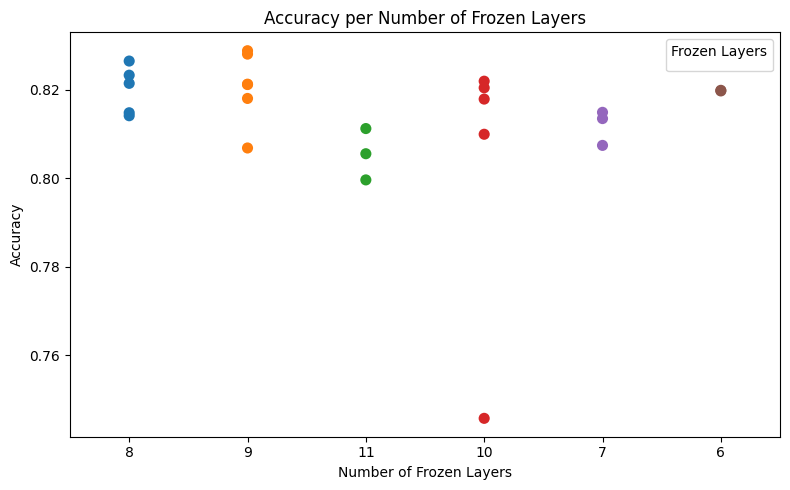

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['freeze_layers'] = data_filtered['freeze_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='freeze_layers', y='eval/accuracy', hue='freeze_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of Frozen Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_84536/ipykernel_101461/482494599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['batch_size'] = data_filtered['batch_size'].astype(str)  # or use Categorical if you want specific order
/tmp/ui556004/login23-1_84536/ipykernel_101461/482494599.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


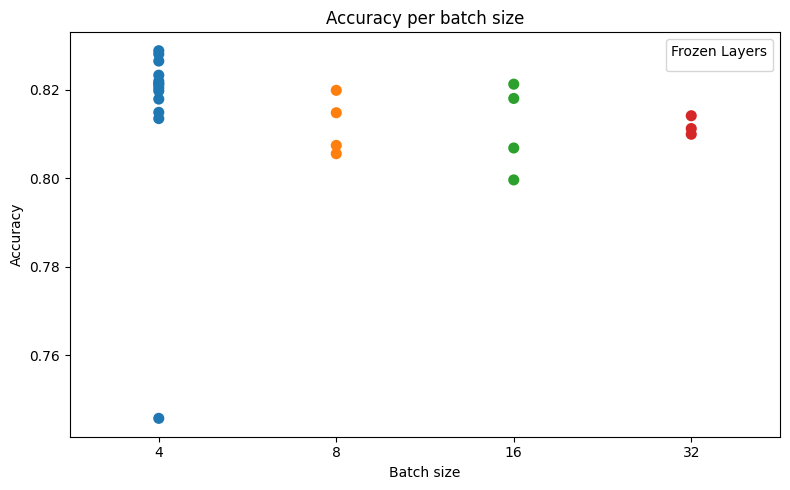

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['batch_size'] = data_filtered['batch_size'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("Accuracy per batch size")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_84536/ipykernel_101461/3788011030.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


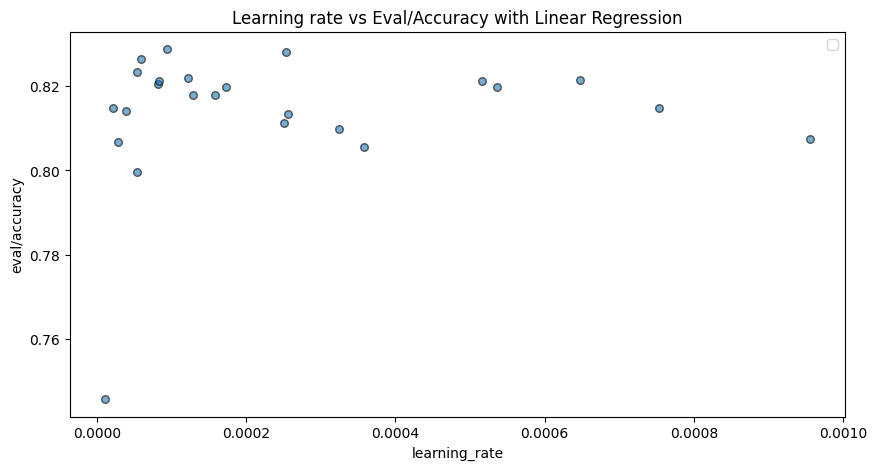

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume df is already loaded with columns "dropout_top" and "eval/accuracy"
x = data_filtered["learning_rate"].values
y = data_filtered["eval/accuracy"].values

# Fit linear regression
X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Prepare data for plotting
order = np.argsort(x)
x_sorted = x[order]
y_pred_sorted = model.predict(x_sorted.reshape(-1, 1))

# Compute rolling mean for trend line
window = max(8, len(x) // 20)
y_smooth = pd.Series(y[order]).rolling(window= 5, min_periods=4, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha=0.6, edgecolors='k', s=30)
#ax.plot(x_sorted, y_smooth, lw=2, label='Rolling Mean Trend')
#ax.plot(x_sorted, y_pred_sorted, lw=2, label='Linear Regression Fit')

ax.set_xlabel("learning_rate")
ax.set_ylabel("eval/accuracy")
ax.set_title("Learning rate vs Eval/Accuracy with Linear Regression")
ax.legend()

plt.show()

In [28]:
data_filtered.columns.values

array(['Name', 'State', 'Group', 'seed', 'eval/inversion_accuracy',
       'train/learning_rate', 'eval/key_pc_mode_accuracy',
       'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'Notes', 'eval/accuracy',
       'hyperparams.inversion.linear_layers_dim',
       'hyperparams.key_pc_mode.activation_fn',
       'hyperparams.inversion.activation_fn',
       'hyperparams.inversion.normalisation',
       'hyperparams.inversion.pooler_dropout',
       'hyperparams.freeze_layers'], dtype=object)

/tmp/ui556004/login23-1_84536/ipykernel_101461/744711177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order
/tmp/ui556004/login23-1_84536/ipykernel_101461/744711177.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


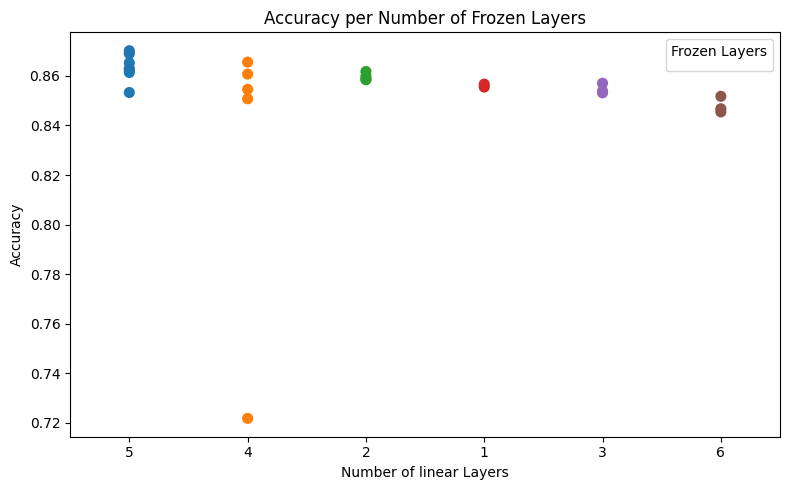

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

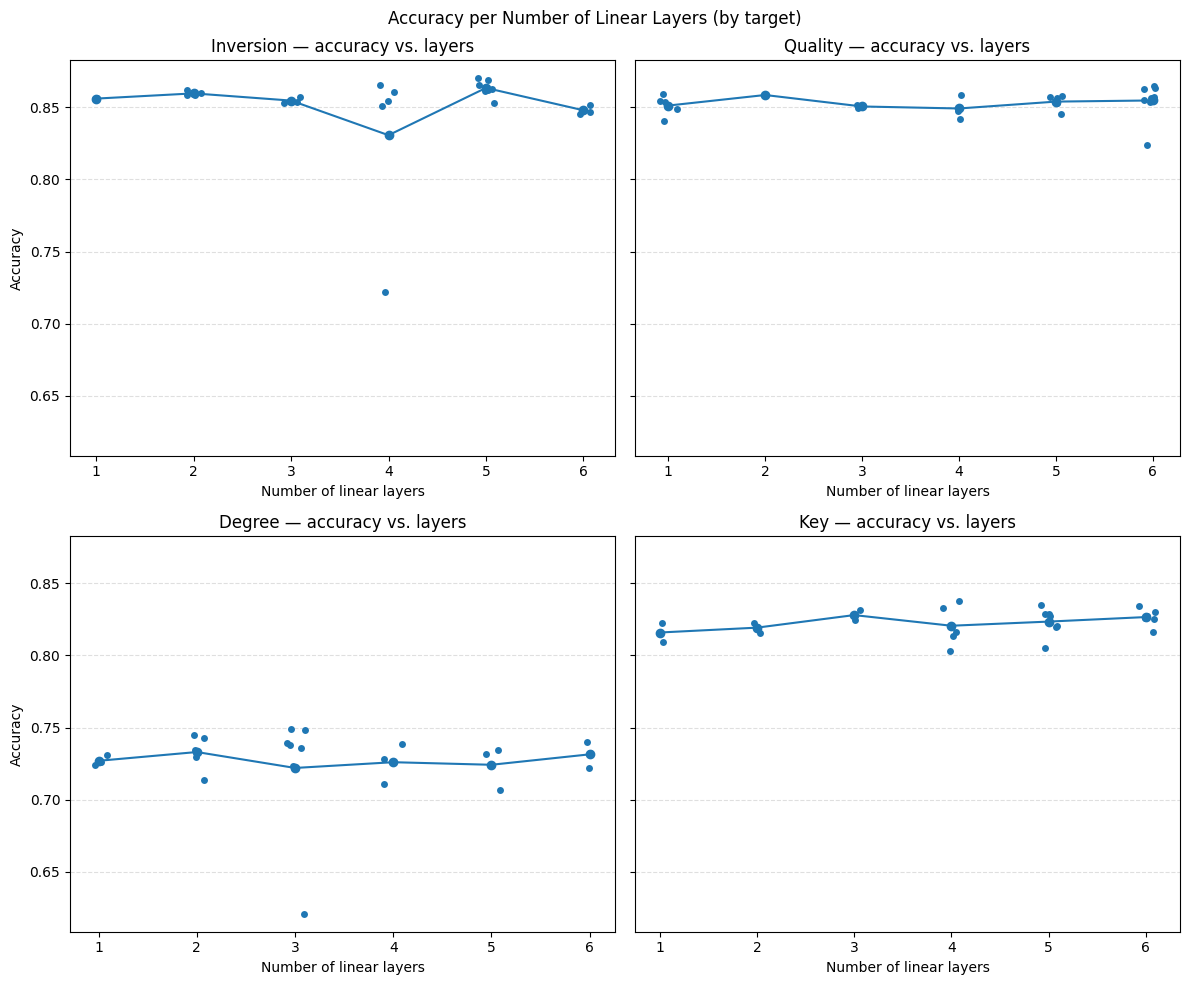

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = data_filtered.copy()

def pick_col(frame, candidates):
    for c in candidates:
        if c in frame.columns:
            return c
    raise KeyError(f"None of {candidates} found in DataFrame columns.")

# Define targets with possible column-name variants
targets = [
    ("Inversion",
     ["inversion.num_linear_layers", "inversion_num_linear_layers"],
     ["eval/inversion_accuracy", "eval_inversion_accuracy"]),
    ("Quality",
     ["quality.num_linear_layers", "quality_num_linear_layers"],
     ["eval/quality_accuracy", "eval_quality_accuracy"]),
    ("Degree",
     ["primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers", "degree_num_linear_layers"],
     ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy", "eval_degree_accuracy"]),
    ("Key",
     ["key.num_linear_layers", "key_pc_mode.num_linear_layers", "key_num_linear_layers", "key_pc_mode_num_linear_layers"],
     ["eval/key_pc_mode_accuracy", "eval/key_accuracy", "eval_key_pc_mode_accuracy", "eval_key_accuracy"]),
]

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.ravel()

for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df, layer_cands)
    acc_col   = pick_col(df, acc_cands)
    #ax.set_ylim(0.7, 0.9)

    # Make layer categorical (ordered by the numeric value)
    # Fall back to lexicographic if casting fails
    try:
        order = sorted(df[layer_col].dropna().astype(int).astype(str).unique(), key=lambda s: int(s))
    except Exception:
        order = sorted(df[layer_col].dropna().astype(str).unique())

    plot_df = df.copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)

    # Jittered points + per-layer mean trend
    sns.stripplot(
        data=plot_df, x=layer_col, y=acc_col,
        order=order, jitter=True, size=5, ax=ax
    )

    # Overlay means per number of layers
    means = (plot_df.groupby(layer_col, observed=True)[acc_col]
                      .mean()
                      .reindex(order))
    ax.plot(order, means.values, marker='o')

    ax.set_xlabel("Number of linear layers")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{name} — accuracy vs. layers")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

fig.suptitle("Accuracy per Number of Linear Layers (by target)", y=0.98)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.activatin_fn'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_84536/ipykernel_101461/3230526467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))
/tmp/ui556004/login23-1_84536/ipykernel_101461/3230526467.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


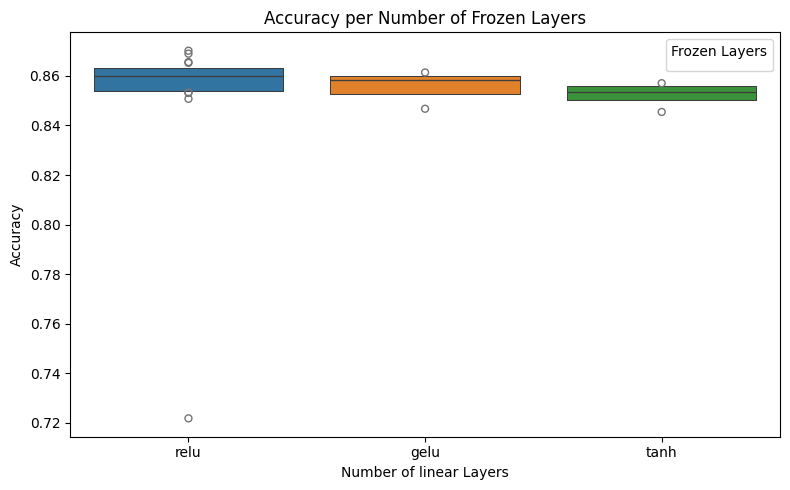

In [56]:
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
statistics.mode(data_filtered['hyperparams.inversion.activation_fn'][0])
data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))


# Ensure freeze_layers is treated as categorica

# Create the plot
plt.figure(figsize=(8, 5))
sns.boxenplot(data=data_filtered, x="inverision.activation_fn.mode", y='eval/inversion_accuracy', hue="inverision.activation_fn.mode",  palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()